# Lead Scoring - Case Study

## Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


## Importing Libraries and Data

In [399]:
#importing required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [400]:
os.getcwd()

'C:\\Users\\Shekh\\Downloads'

In [401]:
#importing assignment dataset

df=pd.read_csv('Leads.csv')

## Inspecting the Dataframe

In [402]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [403]:
#checking the size of the data

df.shape

(9240, 37)

In [404]:
#Statstical aspects of the dataframe
df.describe()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [405]:
# check info of the data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data cleaning (EDA)

In [406]:
# find missing values

df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [407]:
df.isnull().sum().sort_values(ascending=False)/ len(df)*100

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [408]:
# Dropping all the columns with more than 3000 values/35% of missing values

for col in df.columns:
    if df[col].isnull().sum()>3000:
        df.drop(col,axis=1,inplace=True)

In [409]:

df.shape

(9240, 31)

In [410]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [411]:
df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [412]:
# country and city columns doesnt add any significante information hence dropping 
df.drop(['City'],axis=1,inplace=True)
df.drop(['Country'],axis=1,inplace=True)

In [413]:
df.shape

(9240, 29)

In [414]:
## giving treatment to remaining missing values 
df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

In [415]:
# Lets do a value count for the categorical veriable having null values

In [416]:
df['What matters most to you in choosing a course'].value_counts(dropna=False, normalize=True)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [417]:
# 'Better Career Prospects' has 70% values in the this column, hence can be imputed NA values by mode value 'Better Career Prospects'

df['What matters most to you in choosing a course'].fillna(df['What matters most to you in choosing a course'].mode()[0],inplace=True)

In [418]:
df['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [419]:
df['Lead Profile'].value_counts(dropna=False, normalize=True)*100

Select                         44.870130
NaN                            29.318182
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: Lead Profile, dtype: float64

In [420]:
# Lead profile column has almost 45% values for which no option was selected along with almost 30% of missing values,hence drpping the column
df.drop(['Lead Profile'],axis=1,inplace=True)

In [421]:
df['What is your current occupation'].value_counts(dropna=False, normalize=True)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [422]:
df.shape

(9240, 28)

In [423]:
df['How did you hear about X Education'].value_counts(dropna=False, normalize=True)*100

Select                   54.577922
NaN                      23.885281
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64

In [424]:
# 'How did you hear about X Education' column has almost 54% values for which no option was selected along with almost 24% of missing values,hence drpping the column
df.drop(['How did you hear about X Education'],axis=1,inplace=True)

In [425]:
df.shape

(9240, 27)

In [426]:
df['Lead Source'].value_counts(dropna=False, normalize=True)*100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
Pay per Click Ads     0.010823
testone               0.010823
blog                  0.010823
youtubechannel        0.010823
WeLearn               0.010823
welearnblog_Home      0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [427]:
# we have 0.38% missing values in 'Lead Source' column hence can be imputed NA values by mode value 'Google'
df['Lead Source'].fillna(df['Lead Source'].mode()[0],inplace=True)

In [428]:
df['Lead Source'].value_counts(normalize=True)*100

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Live Chat             0.021645
Social Media          0.021645
Pay per Click Ads     0.010823
testone               0.010823
blog                  0.010823
youtubechannel        0.010823
WeLearn               0.010823
welearnblog_Home      0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [429]:
df['Specialization'].value_counts(dropna=False, normalize=True)*100

Select                               21.017316
NaN                                  15.562771
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [430]:
# 'Specialization' column has almost 21% values for which no option was selected along with almost 15% of missing values
# since its an important column, we will fill NA values with 'others' and deal with the select option values
df=df.replace("Select", np.nan)

In [431]:
df['Specialization'].value_counts(dropna=False, normalize=True)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [432]:

df['Specialization'].fillna('others',inplace=True)

In [433]:
df['Specialization'].value_counts(normalize=True)*100


others                               36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [434]:
df.isnull().sum().sort_values(ascending=False)

What is your current occupation                  2690
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Prospect ID                                         0
Newspaper Article                                   0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
What matters most to you in choosing a course       0
Magazine                                            0
Search                                              0
Lead Number                 

In [435]:
df.isnull().sum().sort_values(ascending=False)/ len(df)*100

What is your current occupation                  29.112554
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Prospect ID                                       0.000000
Newspaper Article                                 0.000000
A free copy of Mastering The Interview            0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
What matters most to you in choosing a course     0.000000
Magazine                                          0.0000

In [436]:
df['What is your current occupation'].value_counts(dropna=False,normalize=True)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [437]:
# Since no information has been provided regarding occupation, we can replace missing values with new category 'Not provided'
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Not provided')

In [438]:
df['What is your current occupation'].value_counts(dropna=False,normalize=True)*100

Unemployed              60.606061
Not provided            29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [439]:
df['Last Activity'].value_counts(dropna=False,normalize=True)*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Marked Spam                0.021645
Email Received                   0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [440]:
# we have 0.38% missing values in 'Lead Source' column hence can be imputed NA values by mode value 'Google'
df['Last Activity'].fillna(df['Last Activity'].mode()[0],inplace=True)

In [441]:
df['Last Activity'].value_counts(normalize=True)*100

Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Marked Spam                0.021645
Email Received                   0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [442]:
# Below numerical columns has around 2% of the missing values hence dropping those missing value count
#TotalVisits           1.984733
#Page Views Per Visit  1.984733

In [443]:
df=df[~pd.isnull(df['TotalVisits'])]

In [444]:
df.shape

(9103, 27)

In [445]:
df=df[~pd.isnull(df['Page Views Per Visit'])]

In [446]:
df.shape

(9103, 27)

In [447]:
df.isnull().sum().sort_values(ascending=False)/ len(df)*100

Prospect ID                                      0.0
Search                                           0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
What matters most to you in choosing a course    0.0
Lead Number                                      0.0
What is your current occupation                  0.0
Specialization                                   0.0
Last Activity                                    0.0
Page Views Per Visit                          

In [448]:
# As we have handled all the missing values lets to some EDA

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9103 non-null   object 
 1   Lead Number                                    9103 non-null   int64  
 2   Lead Origin                                    9103 non-null   object 
 3   Lead Source                                    9103 non-null   object 
 4   Do Not Email                                   9103 non-null   object 
 5   Do Not Call                                    9103 non-null   object 
 6   Converted                                      9103 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9103 non-null   int64  
 9   Page Views Per Visit                           9103 

In [450]:
cat_columns = df.columns.astype('object')
cat_columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [451]:
for col in df:
    print('******************************************************')
    print(df[col].astype('object').value_counts())
    

******************************************************
f927a35b-32e4-4d70-958f-fe53ed0f6927    1
3bfccb90-3df4-4ebe-9a4e-8557e09327a0    1
58d10ee6-7d87-447b-9d22-c41e9561451b    1
524cfc0c-4a1a-4236-bab1-281d4560c37b    1
e9cfe101-e794-455f-9c0d-b003ac44c3f6    1
                                       ..
4a959213-0cef-4b5f-bab0-9198557b5d8f    1
5f12844e-d4d1-4316-b040-6eabb8695bde    1
faa68f92-d56c-4411-bab0-fbf1cf9f0815    1
80ffbb0e-a3e7-4afe-905d-0172fdd48a15    1
585d56bd-027d-4dd0-ab3c-2c83a8031428    1
Name: Prospect ID, Length: 9103, dtype: int64
******************************************************
655360    1
633527    1
631563    1
633515    1
584366    1
         ..
595222    1
592698    1
618841    1
626281    1
620768    1
Name: Lead Number, Length: 9103, dtype: int64
******************************************************
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dt

## Categorical Attributes Analysis
## Imbalanced Variables
    

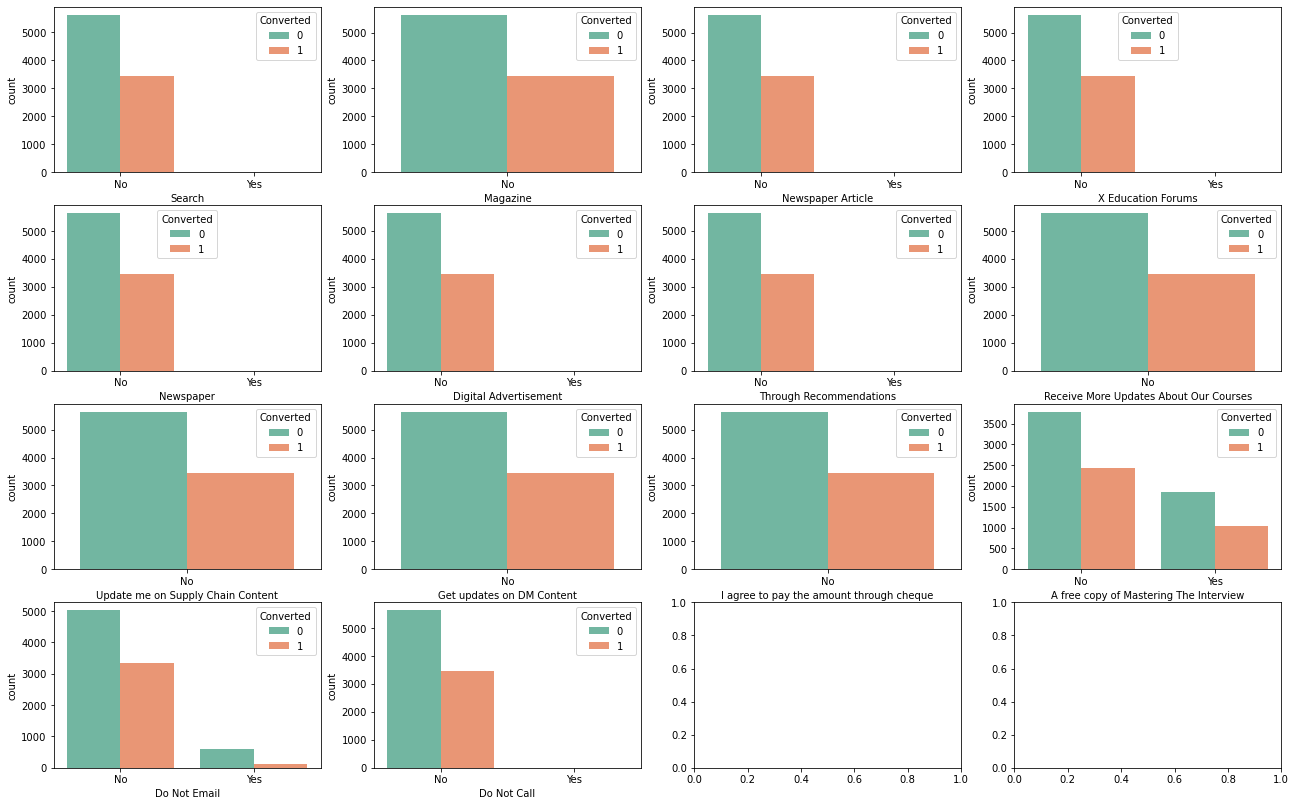

In [452]:
# Visualzing binary categorical variables for imbalancing
fig, axs = plt.subplots(4,4,figsize = (22,14))
sns.countplot(x = "Search", hue = "Converted", data = df, ax = axs[0,0],palette = 'Set2')
sns.countplot(x = "Magazine", hue = "Converted", data = df, ax = axs[0,1],palette = 'Set2')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df, ax = axs[0,2],palette = 'Set2')
sns.countplot(x = "X Education Forums", hue = "Converted", data = df, ax = axs[0,3],palette = 'Set2')
sns.countplot(x = "Newspaper", hue = "Converted", data = df, ax = axs[1,0],palette = 'Set2')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df, ax = axs[1,1],palette = 'Set2')
sns.countplot(x = "Through Recommendations", hue = "Converted", data = df, ax = axs[1,2],palette = 'Set2')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = df, ax = axs[1,3],palette = 'Set2')
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = df, ax = axs[2,0],palette = 'Set2')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = df, ax = axs[2,1],palette = 'Set2')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = df, ax = axs[2,2],palette = 'Set2')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df, ax = axs[2,3],palette = 'Set2')
sns.countplot(x = "Do Not Email", hue = "Converted", data = df, ax = axs[3,0],palette = 'Set2')
sns.countplot(x = "Do Not Call", hue = "Converted", data = df, ax = axs[3,1],palette = 'Set2')
plt.show()

# Inference

For all these columns except 'A free copy of Mastering The Interview' and 'Do not email' data is highly imbalanced, thus we will drop them


In [453]:
cols_to_drop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                 'Do Not Call'])

In [454]:
# columns 'Prospect ID' and 'Lead Number' having unique values for each row , which does not add any value for the analysis 
# We will drop those columns


In [455]:
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call']

In [456]:
cols_to_drop.extend(['Prospect ID' , 'Lead Number'])

In [457]:
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Prospect ID',
 'Lead Number']

In [458]:
# Remove the Not Required Columns 
df.drop(labels=cols_to_drop,axis=1,inplace=True)

In [459]:
df.shape

(9103, 13)

In [460]:
df.head(3)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,others,Unemployed,Better Career Prospects,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,others,Unemployed,Better Career Prospects,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Yes,Email Opened


In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9103 non-null   object 
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   object 
 3   Converted                                      9103 non-null   int64  
 4   TotalVisits                                    9103 non-null   float64
 5   Total Time Spent on Website                    9103 non-null   int64  
 6   Page Views Per Visit                           9103 non-null   float64
 7   Last Activity                                  9103 non-null   object 
 8   Specialization                                 9103 non-null   object 
 9   What is your current occupation                9103 

#### Lead Origin


In [462]:
#checking value counts of Lead origin column

df['Lead Origin'].value_counts().sort_values(ascending=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

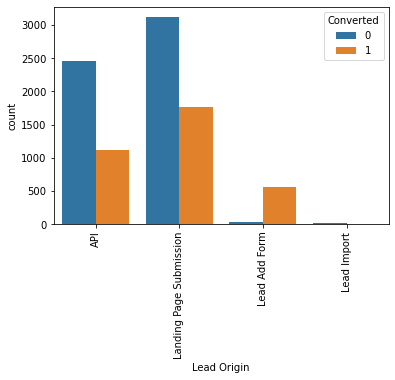

In [463]:
sns.countplot(x='Lead Origin', hue='Converted' , data = df)
plt.xticks(rotation=90)
plt.show()

# Inference

1) Maximum leads generated by 'Landing Page Submission' and their conversion rate is more than 50%.

-- Leads generated by 'API' is also high but conversion rate is low. 

2) Leads generation with 'Lead add form' is low but Conversion rate very high.

#### Lead Source

In [464]:
#checking value counts of Lead Source column

df['Lead Source'].value_counts().sort_values(ascending=False)

Google               2897
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
Pay per Click Ads       1
testone                 1
blog                    1
youtubechannel          1
WeLearn                 1
welearnblog_Home        1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [465]:
#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
df['Lead Source'] = df['Lead Source'].replace('google','Google')

#combining low frequency values to Others

df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel',
                                                           'welearnblog_Home','WeLearn','blog','Pay per Click Ads',
                                                           'testone','NC_EDM','Live Chat','Social Media'] ,'Others')

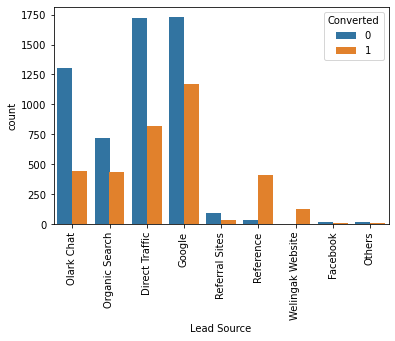

In [466]:
sns.countplot(x='Lead Source', hue='Converted' , data = df)
plt.xticks(rotation=90)
plt.show()

# Inference

Maximum Lead generated by Google and Direct Traffic and Google's conversion rate is more than 50% .

Conversion rate of Reference leads and Welinkgak Website leads is very high.

#### Do Not Email

In [467]:
#checking value counts of Do Not Email

df['Do Not Email'].value_counts().sort_values(ascending=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

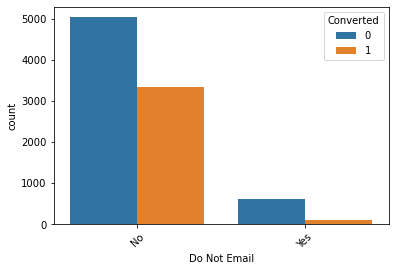

In [468]:
sns.countplot(x='Do Not Email', hue='Converted' , data = df)
plt.xticks(rotation=45)
plt.show()

# Inferences

Lead generation and conversion rate of 'do not Email'  YES   is very low. Nothing more can be inferred. 

#### Last Activity

In [469]:
#checking value counts of Last Activity column

df['Last Activity'].value_counts().sort_values(ascending=False)

Email Opened                    3437
SMS Sent                        2738
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      61
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [470]:
#combining low frequency values
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

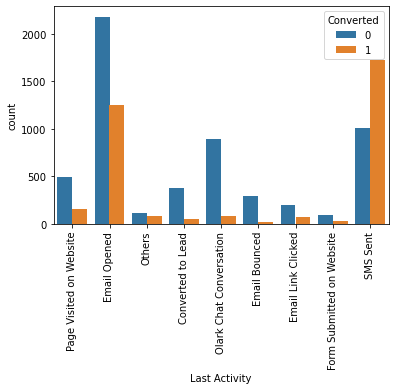

In [471]:
sns.countplot(x='Last Activity', hue='Converted' , data = df)
plt.xticks(rotation=90)
plt.show()

# Inference

1)Maximum leads are generated having last activity as Email opened but conversion rate is not too good.

2)SMS sent as last acitivity has high conversion rate.

#### Specialization

In [472]:
#checking value counts of Specialization column

df['Specialization'].value_counts().sort_values(ascending=False)

others                               3304
Finance Management                    962
Human Resource Management             838
Marketing Management                  824
Operations Management                 500
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 157
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

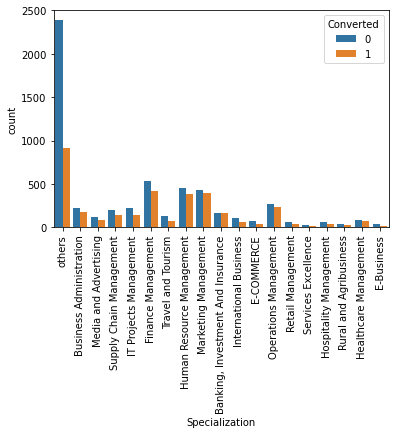

In [473]:
sns.countplot(x='Specialization', hue='Converted' , data = df)
plt.xticks(rotation=90)
plt.show()

# Inference

Nothing significant can be inferred from 'Specialization'.

#### What is your current occupation

In [474]:
#checking value counts of What is your current occupation column

df['What is your current occupation'].value_counts().sort_values(ascending=False)

Unemployed              5502
Not provided            2683
Working Professional     679
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

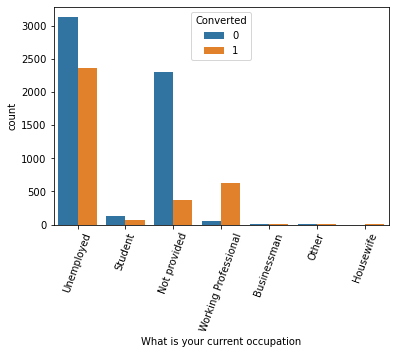

In [475]:
sns.countplot(x='What is your current occupation', hue='Converted' , data = df)
plt.xticks(rotation=70)
plt.show()

# Inference

Maximum leads generated are unemployed and their conversion rate is more than 50%.

Conversion rate of working professionals is very high.

#### What matters most to you in choosing a course

In [476]:
#checking value counts of What matters most to you in choosing a course column

df['What matters most to you in choosing a course'].value_counts().sort_values(ascending=False)

Better Career Prospects      9101
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

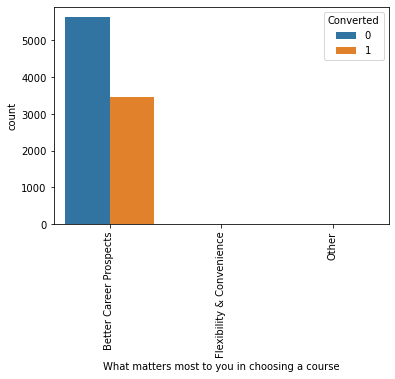

In [477]:
sns.countplot(x='What matters most to you in choosing a course', hue='Converted' , data = df)
plt.xticks(rotation=90)
plt.show()

# Inference
This column spread of variance is very low , hence it can be dropped

In [478]:
df.drop('What matters most to you in choosing a course', axis =1 , inplace = True)

In [479]:
df.shape

(9103, 12)

#### A free copy of Mastering The Interview

In [480]:
#checking value counts of A free copy of Mastering The Interview column

df['A free copy of Mastering The Interview'].value_counts().sort_values(ascending=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

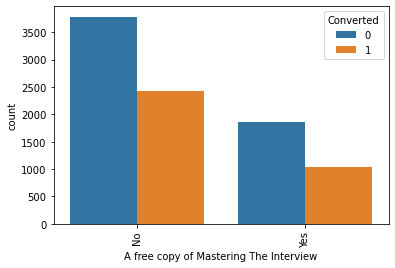

In [481]:
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted' , data = df)
plt.xticks(rotation=90)
plt.show()

# Inference

"A free copy of Mastering The Interview" do not have a spread still we will keep this feature for now


#### Last Notable Activity 

In [482]:
#checking value counts of A Last Notable Activity column

df['Last Notable Activity'].value_counts().sort_values(ascending=False)

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
View in browser link Clicked       1
Form Submitted on Website          1
Approached upfront                 1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

In [483]:
#combining low frequency values

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

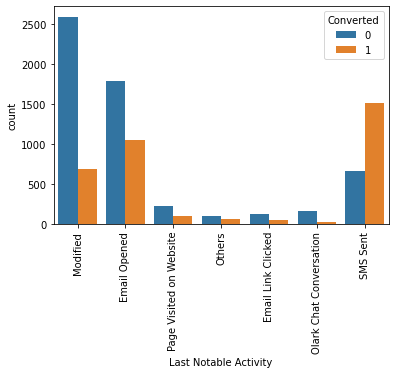

In [484]:
sns.countplot(x='Last Notable Activity', hue='Converted' , data = df)
plt.xticks(rotation=90)
plt.show()

# Inference

1)Maximum leads are generated having last activity as Email opened but conversion rate is not too good.

2)SMS sent as last acitivity has high conversion rate.

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  A free copy of Mastering The Interview  9103 non-null   obje

## Now that we have handled the Categorical columns, Lets handle numeric columns

#### Total Visits

In [486]:
#visualizing spread of variable Total Visits

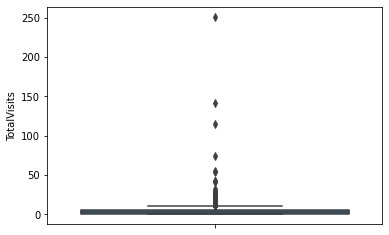

In [487]:
sns.boxplot(y=df['TotalVisits'])
plt.show()

Presence of outliers can be seen clearly

#checking percentile values for "Total Visits"

In [488]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [489]:
#Outlier Treatment: capping the outliers to 95% value for analysis

In [490]:
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

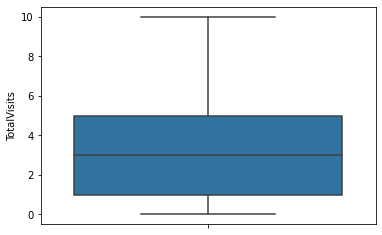

In [491]:
#visualizing variable after outlier treatment
sns.boxplot(y=df['TotalVisits'])
plt.show()

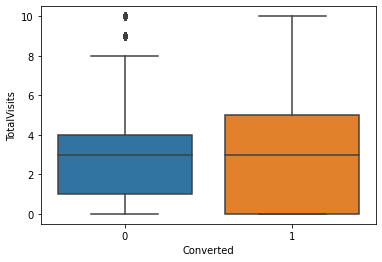

In [492]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

# Inference

As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of variable TotalVisits

#### Total time spent on website

In [493]:
#checking percentiles for "Total Time Spent on Website"
df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
5%          0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
95%      1556.900000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

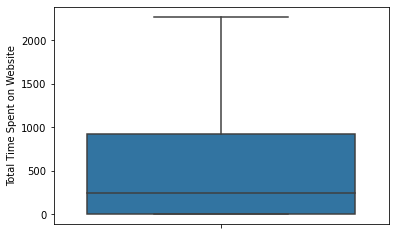

In [494]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = df['Total Time Spent on Website'])
plt.show()

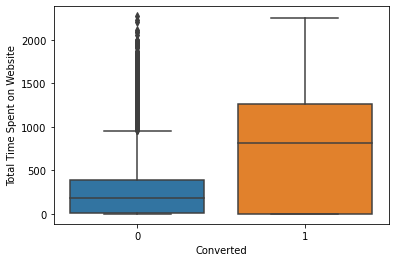

In [495]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.show()

# Inference

As can be seen, leads spending more time on website are more likely to convert , thus website should be made more enagaging to increase conversion rate

#### Page views per visit

In [496]:
df['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

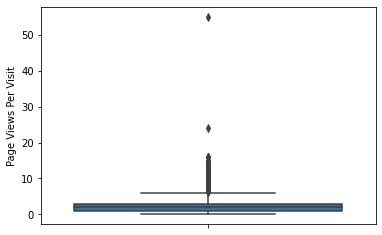

In [497]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =df['Page Views Per Visit'])
plt.show()

In [498]:
df['Page Views Per Visit'].unique()

array([ 0.  ,  2.5 ,  2.  ,  1.  ,  4.  ,  8.  ,  2.67, 11.  ,  5.  ,
        6.  ,  3.  ,  1.33,  1.5 ,  3.5 ,  7.  ,  2.33, 13.  ,  8.5 ,
        5.5 ,  1.67,  4.5 ,  3.33, 16.  , 12.  ,  1.71,  1.8 ,  6.5 ,
        4.33, 14.  ,  3.4 , 10.  ,  1.25,  1.75,  2.63, 15.  ,  2.25,
        3.67,  1.43,  9.  ,  2.6 ,  4.75,  1.27,  3.25,  5.33,  2.57,
        2.17,  2.75,  2.8 ,  2.2 ,  2.86,  3.91,  1.4 ,  5.67,  3.2 ,
        1.38,  2.09,  2.4 , 55.  ,  5.25,  6.71,  3.57,  2.22,  1.83,
        3.6 ,  1.2 ,  1.57,  1.56,  5.4 ,  4.25,  1.31,  1.6 ,  2.9 ,
        1.23,  1.78,  3.83,  7.5 ,  1.14,  2.71,  1.45,  2.38,  1.86,
        2.29,  1.21, 12.33,  3.43,  2.56,  6.33,  1.64,  8.21,  4.4 ,
        3.17,  8.33,  1.48,  1.22, 24.  ,  3.75,  6.67,  1.54,  2.13,
        2.14,  2.45,  3.29,  4.17,  1.63,  3.38,  1.17, 14.5 ,  3.8 ,
        1.19,  3.82,  2.83,  1.93, 11.5 ,  2.08])

In [499]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

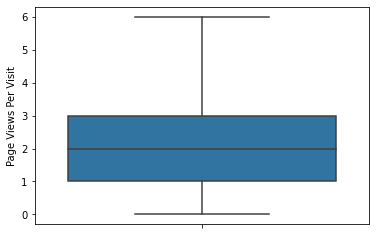

In [500]:
#visualizing variable after outlier treatment
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

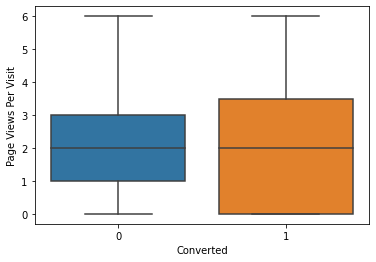

In [501]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)
plt.show()

# Inference

Median for converted and not converted leads is almost same.

Nothing conclusive can be said on the basis of Page Views Per Visit.

In [502]:
# Now check the conversions for all numeric values

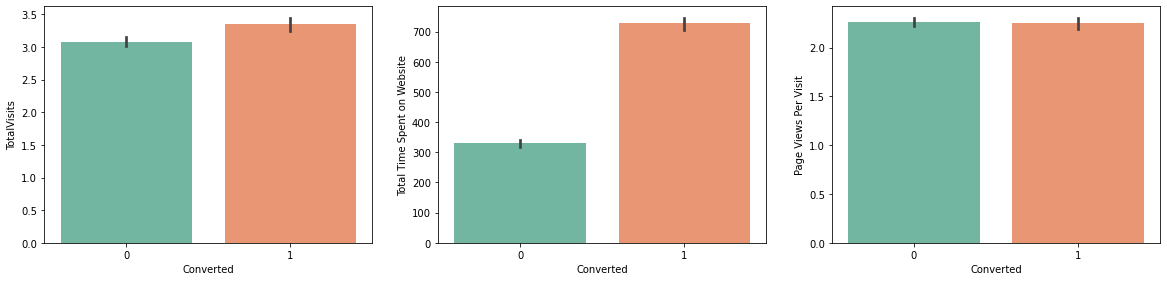

In [503]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = df)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = df)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = df)
plt.show()

# Inference

The conversion rate is high for Total Visits, Total Time Spent on Website and Page Views Per Visit


### Now, all data labels are in good shape , we will proceed to our next step which is Data Preparation

In [504]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.02043282434362

In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  A free copy of Mastering The Interview  9103 non-null   obje

# Dummy Variable Creation

In [506]:
#getting a list of categorical columns

cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [507]:
for col in df:
    print('******************************************************')
    print(df[col].astype('object').value_counts())

******************************************************
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64
******************************************************
Google              2902
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                23
Name: Lead Source, dtype: int64
******************************************************
No     8379
Yes     724
Name: Do Not Email, dtype: int64
******************************************************
0    5642
1    3461
Name: Converted, dtype: int64
******************************************************
0.0     2189
2.0     1680
3.0     1306
4.0     1120
5.0      783
10.0     467
6.0      466
1.0      395
7.0      309
8.0      224
9.0      164
Name: TotalVisits, dtype: int64
**************************

In [508]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})


df[varlist] = df[varlist].apply(binary_map)

In [509]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,others,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,others,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,others,Unemployed,0,Modified


In [510]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

df = pd.concat([df,dummy],1)

In [511]:
df.shape

(9103, 63)

In [512]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,others,Unemployed,...,0,0,1,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,others,Unemployed,...,0,0,1,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,1,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,...,0,0,1,0,0,1,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,others,Unemployed,...,0,0,1,0,0,1,0,0,0,0


In [513]:
#dropping the original columns after dummy variable creation

df.drop(cat_cols,axis = 1,inplace = True)

In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 53 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9103 non-null   int64  
 1   TotalVisits                                           9103 non-null   float64
 2   Total Time Spent on Website                           9103 non-null   int64  
 3   Page Views Per Visit                                  9103 non-null   float64
 4   Lead Origin_Landing Page Submission                   9103 non-null   uint8  
 5   Lead Origin_Lead Add Form                             9103 non-null   uint8  
 6   Lead Origin_Lead Import                               9103 non-null   uint8  
 7   Lead Source_Facebook                                  9103 non-null   uint8  
 8   Lead Source_Google                                    9103

In [515]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [516]:
for col in df:
    print('******************************************************')
    print(df[col].astype('uint8').value_counts())

******************************************************
0    5642
1    3461
Name: Converted, dtype: int64
******************************************************
0     2189
2     1680
3     1306
4     1120
5      783
10     467
6      466
1      395
7      309
8      224
9      164
Name: TotalVisits, dtype: int64
******************************************************
0      2208
31       42
15       41
86       40
74       39
       ... 
175      15
220      15
218      14
229      13
194      13
Name: Total Time Spent on Website, Length: 256, dtype: int64
******************************************************
2    2235
0    2189
3    1360
1    1212
4     956
6     604
5     547
Name: Page Views Per Visit, dtype: int64
******************************************************
1    4886
0    4217
Name: Lead Origin_Landing Page Submission, dtype: int64
******************************************************
0    8495
1     608
Name: Lead Origin_Lead Add Form, dtype: int64
*********************

# Model Building 

#### Train-Test Split

In [517]:
# Putting target variable to y

X=df.drop('Converted', axis=1)

y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [518]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [519]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 7962 to 5734
Data columns (total 52 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6372 non-null   float64
 1   Total Time Spent on Website                           6372 non-null   int64  
 2   Page Views Per Visit                                  6372 non-null   float64
 3   Lead Origin_Landing Page Submission                   6372 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6372 non-null   uint8  
 5   Lead Origin_Lead Import                               6372 non-null   uint8  
 6   Lead Source_Facebook                                  6372 non-null   uint8  
 7   Lead Source_Google                                    6372 non-null   uint8  
 8   Lead Source_Olark Chat                                6

#### Scaling of Data

In [520]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7962,-0.068258,1.476324,-0.423364,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
5520,1.362470,-0.771066,2.083179,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1962,0.647106,-0.571257,0.133646,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1566,2.435517,1.393834,0.690655,1,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
9170,-1.141305,-0.881052,-1.258878,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


### Model Building using Stats Model & RFE

In [521]:
import statsmodels.api as sm

In [522]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [523]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False,  True,
       False, False, False, False,  True,  True, False,  True, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
        True, False, False, False,  True, False,  True])

In [524]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 5),
 ('Lead Source_Facebook', False, 15),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 27),
 ('Lead Source_Others', False, 19),
 ('Lead Source_Reference', False, 14),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 18),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 4),
 ('Last Activity_Page Visited on Website', False, 13),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 21),
 ('Specia

In [525]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website', 'Last Activity_Others',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Spec

In [526]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Specialization_others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

#### BUILDING MODEL 1

In [527]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
logm1.params



const                                                   -0.914297
Total Time Spent on Website                              1.086854
Lead Origin_Landing Page Submission                     -0.907278
Lead Origin_Lead Add Form                                3.146228
Lead Source_Olark Chat                                   1.076590
Lead Source_Welingak Website                             2.194556
Last Activity_Email Bounced                             -1.856346
Last Activity_Email Opened                               0.763275
Last Activity_Olark Chat Conversation                   -0.720883
Last Activity_SMS Sent                                   0.961846
Specialization_others                                   -0.838050
What is your current occupation_Housewife               23.029317
What is your current occupation_Not provided            -1.090457
What is your current occupation_Working Professional     2.428388
Last Notable Activity_Others                             1.490647
Last Notab

In [528]:
#Let's see the summary of our logistic regression model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.0
Date:                Tue, 22 Aug 2023   Deviance:                       5142.0
Time:                        21:51:54   Pearson chi2:                 6.23e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [529]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [530]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_SMS Sent,6.31
14,Last Notable Activity_SMS Sent,5.17
1,Lead Origin_Landing Page Submission,2.86
9,Specialization_others,2.69
6,Last Activity_Email Opened,2.43
3,Lead Source_Olark Chat,2.19
7,Last Activity_Olark Chat Conversation,1.78
2,Lead Origin_Lead Add Form,1.68
11,What is your current occupation_Not provided,1.62
4,Lead Source_Welingak Website,1.35


In [531]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Housewife',1)

#### BUILDING MODEL 2

In [532]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
logm2.params

const                                                  -0.906383
Total Time Spent on Website                             1.086096
Lead Origin_Landing Page Submission                    -0.903407
Lead Origin_Lead Add Form                               3.152448
Lead Source_Olark Chat                                  1.075529
Lead Source_Welingak Website                            2.186975
Last Activity_Email Bounced                            -1.860147
Last Activity_Email Opened                              0.762595
Last Activity_Olark Chat Conversation                  -0.725083
Last Activity_SMS Sent                                  0.954254
Specialization_others                                  -0.841055
What is your current occupation_Not provided           -1.094892
What is your current occupation_Working Professional    2.420773
Last Notable Activity_Others                            1.484050
Last Notable Activity_SMS Sent                          1.047833
dtype: float64

In [533]:
#Let's see the summary of our logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.2
Date:                Tue, 22 Aug 2023   Deviance:                       5154.4
Time:                        21:51:57   Pearson chi2:                 6.24e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [534]:
# Create a dataframe that will contain the names of all the remaining feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_SMS Sent,6.31
13,Last Notable Activity_SMS Sent,5.17
1,Lead Origin_Landing Page Submission,2.86
9,Specialization_others,2.69
6,Last Activity_Email Opened,2.43
3,Lead Source_Olark Chat,2.19
7,Last Activity_Olark Chat Conversation,1.78
2,Lead Origin_Lead Add Form,1.68
10,What is your current occupation_Not provided,1.62
4,Lead Source_Welingak Website,1.35


In [535]:
#dropping column with high p-value

col = col.drop('Lead Source_Welingak Website',1)

#### BUILDING MODEL 3

In [536]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
logm3.params

const                                                  -0.950798
Total Time Spent on Website                             1.086294
Lead Origin_Landing Page Submission                    -0.862587
Lead Origin_Lead Add Form                               3.579815
Lead Source_Olark Chat                                  1.071622
Last Activity_Email Bounced                            -1.834326
Last Activity_Email Opened                              0.764532
Last Activity_Olark Chat Conversation                  -0.715237
Last Activity_SMS Sent                                  0.970336
Specialization_others                                  -0.784977
What is your current occupation_Not provided           -1.100162
What is your current occupation_Working Professional    2.415885
Last Notable Activity_Others                            1.492549
Last Notable Activity_SMS Sent                          1.035196
dtype: float64

In [537]:
#Let's see the summary of our logistic regression model
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2584.2
Date:                Tue, 22 Aug 2023   Deviance:                       5168.5
Time:                        21:52:01   Pearson chi2:                 6.42e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [538]:
# Create a dataframe that will contain the names of all the remaining feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,6.31
12,Last Notable Activity_SMS Sent,5.17
1,Lead Origin_Landing Page Submission,2.84
8,Specialization_others,2.63
5,Last Activity_Email Opened,2.42
3,Lead Source_Olark Chat,2.18
6,Last Activity_Olark Chat Conversation,1.78
9,What is your current occupation_Not provided,1.62
2,Lead Origin_Lead Add Form,1.36
0,Total Time Spent on Website,1.30


In [539]:
#dropping column with high VIF score

col = col.drop('Last Activity_SMS Sent',1)

#### BUILDING MODEL 4

In [540]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
logm4.params

const                                                  -0.692037
Total Time Spent on Website                             1.084906
Lead Origin_Landing Page Submission                    -0.862484
Lead Origin_Lead Add Form                               3.676997
Lead Source_Olark Chat                                  1.069396
Last Activity_Email Bounced                            -1.984642
Last Activity_Email Opened                              0.495319
Last Activity_Olark Chat Conversation                  -0.986203
Specialization_others                                  -0.782362
What is your current occupation_Not provided           -1.062644
What is your current occupation_Working Professional    2.401253
Last Notable Activity_Others                            1.269851
Last Notable Activity_SMS Sent                          1.737940
dtype: float64

In [541]:
#Let's see the summary of our logistic regression model
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.1
Date:                Tue, 22 Aug 2023   Deviance:                       5202.2
Time:                        21:52:06   Pearson chi2:                 6.41e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [542]:
# Create a dataframe that will contain the names of all the remaining feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Specialization_others,2.49
1,Lead Origin_Landing Page Submission,2.48
3,Lead Source_Olark Chat,2.17
5,Last Activity_Email Opened,2.15
11,Last Notable Activity_SMS Sent,1.88
6,Last Activity_Olark Chat Conversation,1.69
8,What is your current occupation_Not provided,1.60
2,Lead Origin_Lead Add Form,1.31
0,Total Time Spent on Website,1.29
4,Last Activity_Email Bounced,1.20


#### So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data

In [543]:
# Getting the predicted values on the train set
y_train_pred = logm4.predict(X_train_sm)           # giving prob. of getting 1

y_train_pred[:10]

7962    0.856325
5520    0.130592
1962    0.049424
1566    0.945537
9170    0.296183
5097    0.126951
8954    0.499302
309     0.183619
5519    0.335020
1050    0.537601
dtype: float64

In [544]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.85632457, 0.13059191, 0.04942351, 0.94553695, 0.29618265,
       0.12695143, 0.49930175, 0.18361885, 0.33502031, 0.53760083])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [545]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.856325,7962
1,0,0.130592,5520
2,0,0.049424,1962
3,1,0.945537,1566
4,0,0.296183,9170


In [546]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.856325,7962,1
1,0,0.130592,5520,0
2,0,0.049424,1962,0
3,1,0.945537,1566,1
4,0,0.296183,9170,0


In [547]:
from sklearn import metrics

# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3518  435]
 [ 737 1682]]


In [548]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8160703075957313


In [549]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [550]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Specialization_others,2.49
1,Lead Origin_Landing Page Submission,2.48
3,Lead Source_Olark Chat,2.17
5,Last Activity_Email Opened,2.15
11,Last Notable Activity_SMS Sent,1.88
6,Last Activity_Olark Chat Conversation,1.69
8,What is your current occupation_Not provided,1.60
2,Lead Origin_Lead Add Form,1.31
0,Total Time Spent on Website,1.29
4,Last Activity_Email Bounced,1.20


In [551]:
## We have taken VIF cutoff as 5 and from above we can see all the values are below cutoff value.

## Metrics beyond simply accuracy

In [552]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [553]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6953286482017362

In [554]:
# Let us calculate specificity
TN / float(TN+FP)

0.889956994687579

In [555]:
# positive predictive value 
print (TP / float(TP+FP))

0.7945205479452054


In [556]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8267920094007051


### Plotting the ROC Curve

In [557]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [558]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

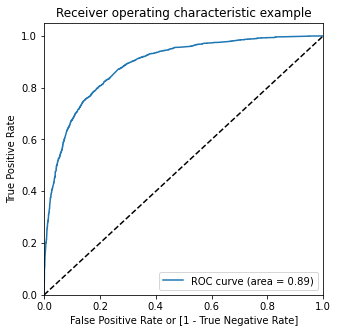

In [559]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [560]:
## Finding Optimal Cutoff Point|

In [561]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.856325,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.130592,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.049424,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.945537,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.296183,9170,0,1,1,1,0,0,0,0,0,0,0


In [562]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.624765  0.972716  0.411839
0.2   0.2  0.757219  0.913187  0.661776
0.3   0.3  0.792844  0.839190  0.764483
0.4   0.4  0.809950  0.768913  0.835062
0.5   0.5  0.816070  0.695329  0.889957
0.6   0.6  0.803672  0.599835  0.928409
0.7   0.7  0.787351  0.522117  0.949658
0.8   0.8  0.759573  0.416288  0.969643
0.9   0.9  0.717514  0.276147  0.987604


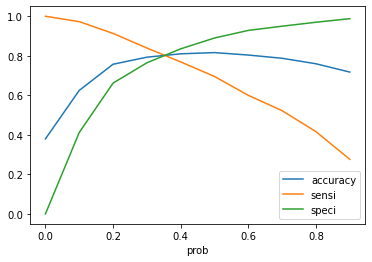

In [563]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [564]:
## From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [565]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.856325,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.130592,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.049424,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.945537,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.296183,9170,0,1,1,1,0,0,0,0,0,0,0,0


In [566]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7928436911487758

In [567]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3022,  931],
       [ 389, 2030]], dtype=int64)

In [568]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [569]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8391897478296817

In [570]:
# Let us calculate specificity
TN / float(TN+FP)

0.7644826713888186

In [571]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23551732861118138


In [572]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6855791962174941


In [573]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8859571973028437


### Precision and Recall

In [574]:
#Looking at the confusion matrix again

In [575]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3518,  435],
       [ 737, 1682]], dtype=int64)

Precision

TP / TP + FP

In [576]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7945205479452054

Recall

TP / TP + FN

In [577]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6953286482017362

In [578]:
## Using sklearn utilities for the same

In [579]:
from sklearn.metrics import precision_score, recall_score

In [580]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7945205479452054

In [581]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6953286482017362

## Precision and recall tradeoff

In [582]:
from sklearn.metrics import precision_recall_curve

In [583]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: predicted, Length: 6372, dtype: int64)

In [584]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

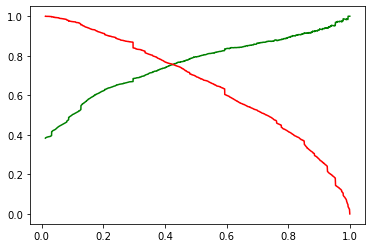

In [585]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [586]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3504,-0.058621,-0.108519,0.416452,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4050,-1.150166,-0.888077,-1.263530,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7201,-0.422469,0.420993,-0.143542,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1196,0.305228,-0.110357,0.976446,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
8219,1.396773,-0.433947,-0.283540,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [587]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Specialization_others,What is your current occupation_Not provided,What is your current occupation_Working Professional,Last Notable Activity_Others,Last Notable Activity_SMS Sent
3504,-0.108519,1,0,0,0,1,0,0,0,0,0,0
4050,-0.888077,0,1,0,0,0,0,0,0,0,0,1
7201,0.420993,1,0,0,0,0,0,0,0,0,0,1
1196,-0.110357,1,0,0,0,1,0,0,0,0,0,0
8219,-0.433947,1,0,0,0,0,0,0,0,0,0,0


In [588]:
X_test_sm = sm.add_constant(X_test)

### PREDICTIONS ON TEST SET

In [589]:
# making prediction using model 4 (final model)
y_test_pred = logm4.predict(X_test_sm)

In [590]:
y_test_pred[:10]

3504    0.235604
4050    0.977233
7201    0.654789
1196    0.235245
8219    0.116571
8747    0.126109
9048    0.611491
6524    0.102026
7693    0.380638
8187    0.951527
dtype: float64

In [615]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [616]:
# Let's see the head
y_pred_1.head()

,0
3504,0.235604
4050,0.977233
7201,0.654789
1196,0.235245
8219,0.116571


In [617]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [618]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [619]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [620]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [621]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.235604
1,1,4050,0.977233
2,0,7201,0.654789
3,0,1196,0.235245
4,1,8219,0.116571


In [622]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [623]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.235604
1,1,4050,0.977233
2,0,7201,0.654789
3,0,1196,0.235245
4,1,8219,0.116571


In [624]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['df'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [625]:

# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,df
0,3504,0,0.235604,24
1,4050,1,0.977233,98
2,7201,0,0.654789,65
3,1196,0,0.235245,24
4,8219,1,0.116571,12


In [626]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [627]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,df,final_Predicted
0,3504,0,0.235604,24,0
1,4050,1,0.977233,98,1
2,7201,0,0.654789,65,1
3,1196,0,0.235245,24,0
4,8219,1,0.116571,12,0


In [628]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8132552178689125

In [629]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1326,  363],
       [ 147,  895]], dtype=int64)

In [630]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [631]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8589251439539347

In [632]:
# Let us calculate specificity
TN / float(TN+FP)

0.7850799289520426

In [633]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7114467408585056

In [634]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8589251439539347

## Observation:
    
After running the model on the Test Data these are the figures we obtain:

Accuracy : 81.32%

Sensitivity : 85.89%

Specificity : 78.50%

## Adding Lead Score Feature to Test dataframe

A higher score would mean that the lead is hot, i.e. is most likely to convert

Whereas a lower score would mean that the lead is cold and will mostly not get converted

In [635]:
# features and their coefficicent from final model
parameters=logm4.params.sort_values(ascending=False)
parameters

Lead Origin_Lead Add Form                               3.676997
What is your current occupation_Working Professional    2.401253
Last Notable Activity_SMS Sent                          1.737940
Last Notable Activity_Others                            1.269851
Total Time Spent on Website                             1.084906
Lead Source_Olark Chat                                  1.069396
Last Activity_Email Opened                              0.495319
const                                                  -0.692037
Specialization_others                                  -0.782362
Lead Origin_Landing Page Submission                    -0.862484
Last Activity_Olark Chat Conversation                  -0.986203
What is your current occupation_Not provided           -1.062644
Last Activity_Email Bounced                            -1.984642
dtype: float64

## Adding Lead Score Feature to Test dataframe

A higher score would mean that the lead is hot, i.e. is most likely to convert

Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [614]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,df,final_Predicted,Lead_Score
0,3504,0,0.235604,24,0,24
1,4050,1,0.977233,98,1,98
2,7201,0,0.654789,65,1,65
3,1196,0,0.235245,24,0,24
4,8219,1,0.116571,12,0,12


## Final Observation:
#### Let us compare the values obtained for Train & Test:

#### Train Data: 

Accuracy : 79.28%
    
Sensitivity : 83.91%
    
Specificity : 76.44%

    
#### Test Data: 
    
Accuracy : 81.32%

Sensitivity : 85.89%

Specificity : 78.50%